# From SDU Export Data Create a Boxplot for five Seracare Controls

In [ ]:
# By: Collin 

In [1]:
import datetime

import os

import glob

import pandas as pd

# Get current working directory
cwd = os.getcwd() 
print("Current working directory:", cwd) 

# Define your function that will be applied to each CSV file

# def extract_and_append_sample_data(input_file, output_file, sample_name):
def extract_and_append_sample_data(input_file, output_file):

    try:

        # Read the CSV file

        df = pd.read_csv(input_file)

        # Perform operations on the dataframe

        print(f"Processing file: {input_file}")

        # # Add a new column for the sample name

        # df['Allocell_Batch'] = batch_name

        # Append the data to the output file

        df.to_csv(output_file, mode='a', index=False, header=not os.path.exists(output_file))

        print(f"Data from {input_file} appended to {output_file}")

    except PermissionError as e:

        print(f"PermissionError: {e}")

        print("Ensure the file is not open in another program and you have the necessary permissions.")

    except Exception as e:

        print(f"An error occurred: {e}")

# Define the relative directory where your CSV files are located

directory_path = os.path.join('.', 'CareDX', 'Export_File')

# Current date and time
now = datetime.datetime.now()

# Formatting dates
formatted_date = now.strftime('%Y-%m-%d')


# Create an f-string for the filename
filename = f"output_{formatted_date}.csv"

# Define the relative output CSV file path

output_csv = os.path.join('.', 'CareDX', 'Output_File', filename)

# Use glob to find all CSV files in the directory

csv_files = glob.glob(os.path.join(directory_path, '*.csv'))


if os.path.exists(f'CareDX/Output_File/{filename}'):
    pass
else:
    for csv_file in csv_files:
        # batch_name = os.path.basename(csv_file).split('.')[0]  # Example: Extract batch name from export file name
    
        extract_and_append_sample_data(csv_file, output_csv)
 

Current working directory: C:\Users\cdubois\OneDrive - CareDx, Inc\Desktop\CareDX
Processing file: .\CareDX\Export_File\cfDNA_Export_File_07222024_B03Apr24.csv
Data from .\CareDX\Export_File\cfDNA_Export_File_07222024_B03Apr24.csv appended to .\CareDX\Output_File\output_2024-08-15.csv
Processing file: .\CareDX\Export_File\cfDNA_Export_File_07222024_B13Feb24.csv
Data from .\CareDX\Export_File\cfDNA_Export_File_07222024_B13Feb24.csv appended to .\CareDX\Output_File\output_2024-08-15.csv
Processing file: .\CareDX\Export_File\cfDNA_Export_File_07222024_B14Jun24.csv
Data from .\CareDX\Export_File\cfDNA_Export_File_07222024_B14Jun24.csv appended to .\CareDX\Output_File\output_2024-08-15.csv
Processing file: .\CareDX\Export_File\cfDNA_Export_File_07222024_B14Mar24.csv
Data from .\CareDX\Export_File\cfDNA_Export_File_07222024_B14Mar24.csv appended to .\CareDX\Output_File\output_2024-08-15.csv
Processing file: .\CareDX\Export_File\cfDNA_Export_File_07222024_B14May24.csv
Data from .\CareDX\Expor

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import chardet

# Temporary path to example file
path_to_file = os.path.join('.', 'CareDX', 'Output_File', filename)

#filename = f"output_{formatted_date}.csv"
with open(path_to_file, 'rb') as f:
   raw_data = f.read()
   result = chardet.detect(raw_data)
   encoding = result['encoding']
   print(f'Detected encoding: {encoding}')

Detected encoding: ascii


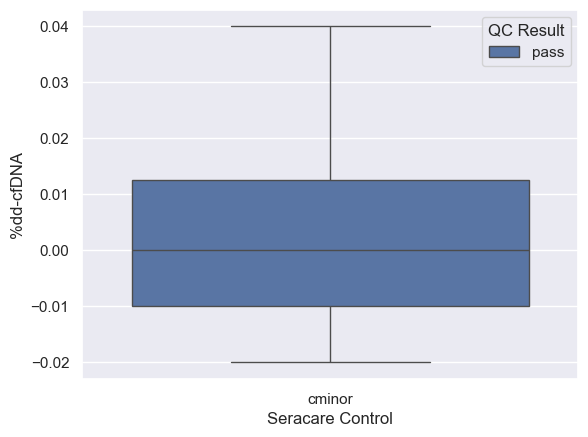

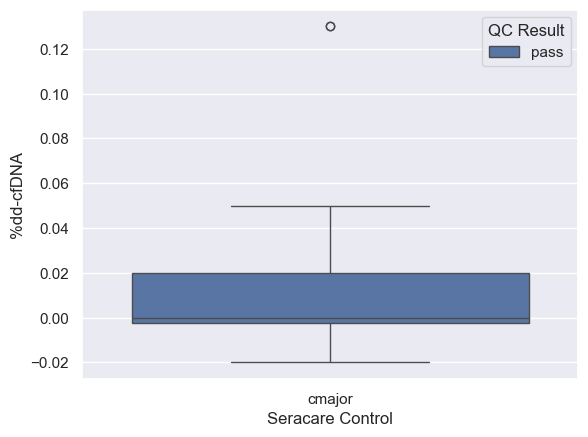

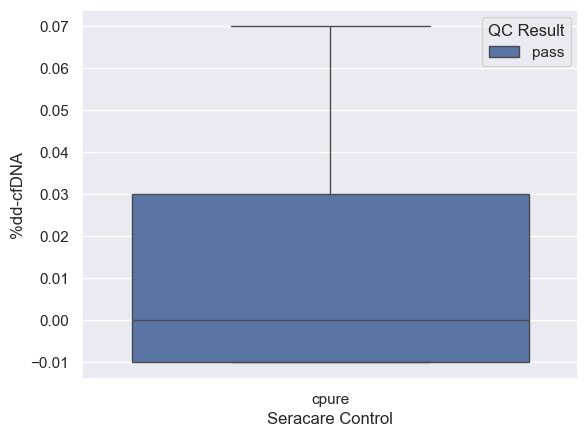

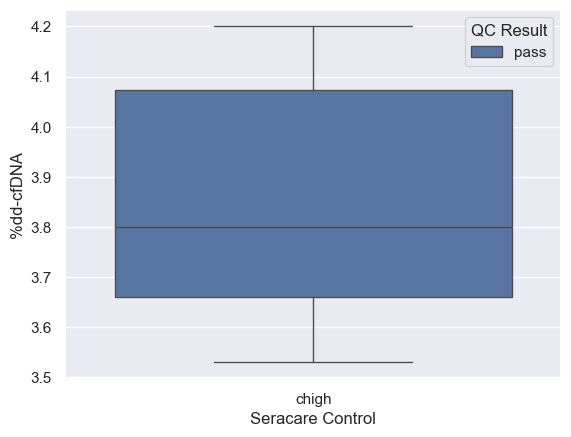

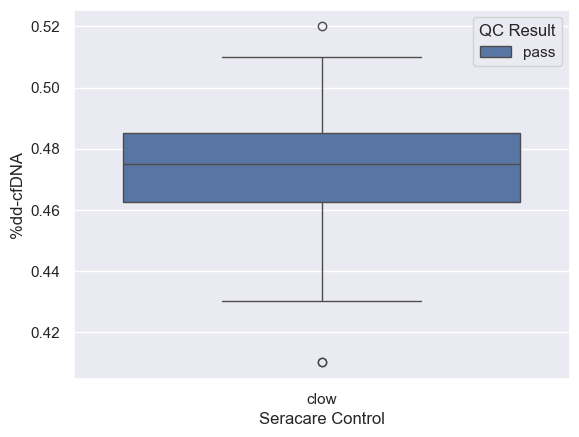

In [3]:
control_values = ('cminor', 'cmajor', 'cpure', 'chigh', 'clow')

def make_boxplot(control):
    df = pd.read_csv(path_to_file)
    df = df.map(lambda x: x.lower() if isinstance(x, str) else x)
    df['%dd-cfDNA'] = df['%dd-cfDNA'].str.rstrip('%').astype(float)
    
    filtered_df = df[df['Sample Name'].str.lower().str.startswith(control)]
    
    df = filtered_df
    # # print(df.head())
    # # Specify the column and value to check
    # column_to_check = 'Sample Name'
    # control_value = control
    # # Check if all cells in the specified column are the control value
    # all_values_match = (df[column_to_check] == control_value).all()
    # # Print the result
    # # if all_values_match:
    # #    print(f"All cells in the column '{column_to_check}' contain the value '{control_value}'.")
    # # else:
    # #     mismatched_rows = df[df[column_to_check] != control_value]
    # #     print(f"Not all cells in the column '{column_to_check}' contain the value '{control_value}'.")
    # #     print("To proceed confirm Rows contain controls for Rows:")
    # #     print(mismatched_rows)
        
        
    df['Sample Name'] = control_value
    sns.set_theme()
    ax = sns.boxplot(x='Sample Name', y='%dd-cfDNA', hue='QC Result', data=df)
    # ax.set(yscale="log")
    plt.xlabel('Seracare Control')

    plt.show()

for control_value in control_values:
    make_boxplot(control_value)

## Kernel Density Formula
### Gaussian kernel:

***
$$ K(u) = \frac{1}{\sqrt{2\pi}} \exp\left(-\frac{u^2}{2}\right) $$

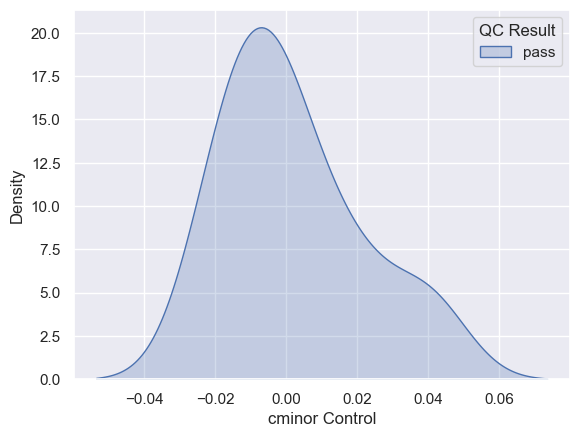

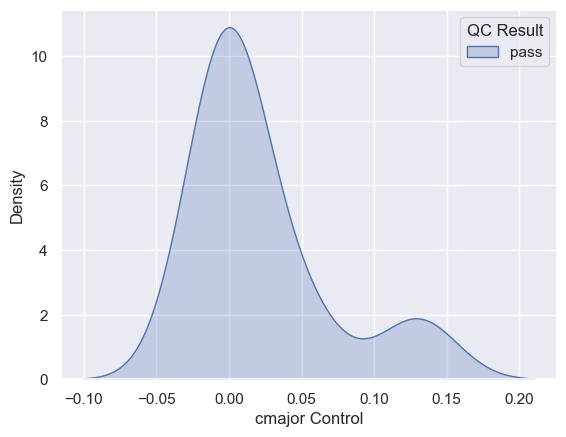

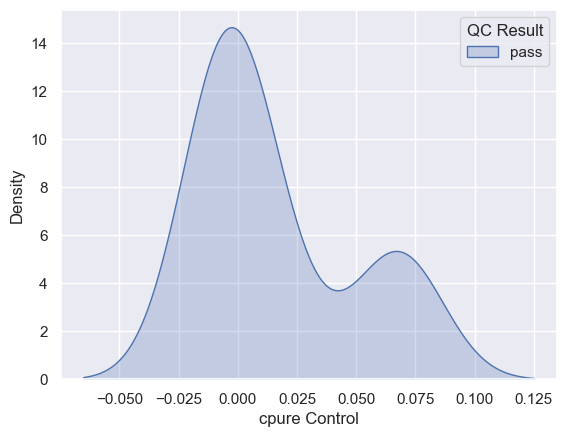

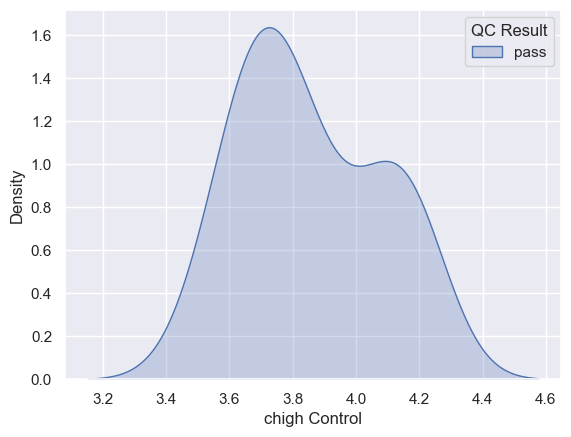

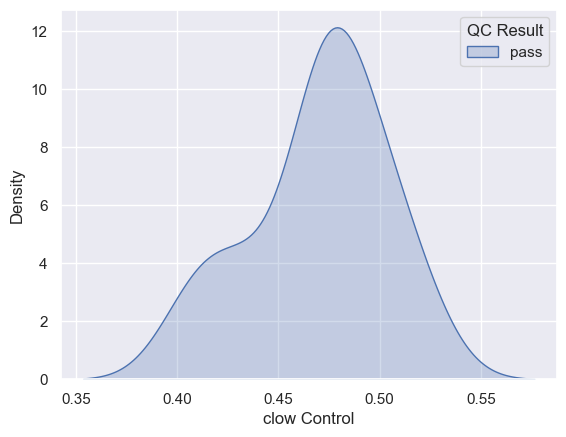

In [4]:
control_values = ('cminor', 'cmajor', 'cpure', 'chigh', 'clow')

def make_deplot(control):
    df = pd.read_csv(path_to_file)
    df = df.map(lambda x: x.lower() if isinstance(x, str) else x)
    df['%dd-cfDNA'] = df['%dd-cfDNA'].str.rstrip('%').astype(float)
    
    filtered_df = df[df['Sample Name'].str.lower().str.startswith(control)]
    
    df = filtered_df
    # # print(df.head())
    # # Specify the column and value to check
    # column_to_check = 'Sample Name'
    # control_value = control
    # # Check if all cells in the specified column are the control value
    # all_values_match = (df[column_to_check] == control_value).all()
    # # Print the result
    # # if all_values_match:
    # #    print(f"All cells in the column '{column_to_check}' contain the value '{control_value}'.")
    # # else:
    # #     mismatched_rows = df[df[column_to_check] != control_value]
    # #     print(f"Not all cells in the column '{column_to_check}' contain the value '{control_value}'.")
    # #     print("To proceed confirm Rows contain controls for Rows:")
    # #     print(mismatched_rows)
        
        
    df['Sample Name'] = control_value
    sns.set_theme()
    ax = sns.kdeplot(x='%dd-cfDNA', hue='QC Result', fill="true", data=df)
    # ax.set(yscale="log")
    plt.xlabel(f'{control_value} Control')

    plt.show()

for control_value in control_values:
    make_deplot(control_value)

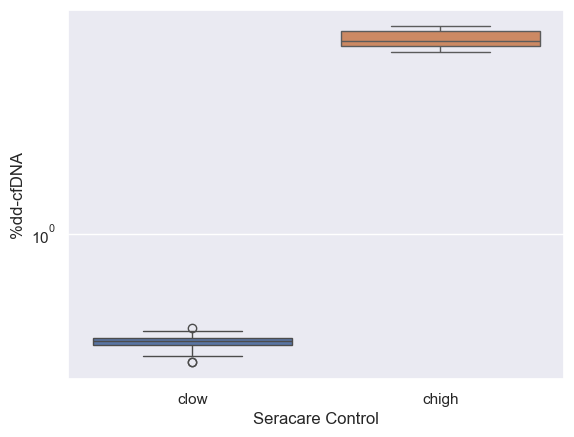

In [5]:
control_values = ('clow', 'chigh')

def make_boxplot(control):
    df = pd.read_csv(path_to_file)
    df = df.map(lambda x: x.lower() if isinstance(x, str) else x)
    df['%dd-cfDNA'] = df['%dd-cfDNA'].str.rstrip('%').astype(float)
    
    filtered_df = df[df['Sample Name'].str.lower().str.startswith(control)]
    
    df = filtered_df
    # print(df.head())
    # Specify the column and value to check
    column_to_check = 'Sample Name'
    control_value = control
    # Check if all cells in the specified column are the control value
    all_values_match = (df[column_to_check] == control_value).all()
    # Print the result
    # if all_values_match:
    #    print(f"All cells in the column '{column_to_check}' contain the value '{control_value}'.")
    # else:
    #     mismatched_rows = df[df[column_to_check] != control_value]
    #     print(f"Not all cells in the column '{column_to_check}' contain the value '{control_value}'.")
    #     print("To proceed confirm Rows contain controls for Rows:")
    #     print(mismatched_rows)
        
        
    df['Sample Name'] = control_value
    sns.set_theme()
    ax = sns.boxplot(x='Sample Name', y='%dd-cfDNA', data=df)
    ax.set(yscale="log")
    plt.xlabel('Seracare Control')

plt.show()

for control_value in control_values:
    make_boxplot(control_value)

In [ ]:
# control_values = ['cminor', 'cmajor', 'cpure', 'chigh', 'clow']

# def make_boxplot(control):
#     df = pd.read_csv(path_to_file)
#     df = df.map(lambda x: x.lower() if isinstance(x, str) else x)
#     df['%dd-cfDNA'] = df['%dd-cfDNA'].str.rstrip('%').astype(float) / 100
    
#     filtered_df = df[df['Sample Name'].str.lower().str.startswith(control)]
    
#     df = filtered_df
#     # print(df.head())
#     # Specify the column and value to check
#     column_to_check = 'Sample Name'
#     control_value = control
#     # Check if all cells in the specified column are the control value
#     all_values_match = (df[column_to_check] == control_value).all()
#     # Print the result
#     # if all_values_match:
#     #    print(f"All cells in the column '{column_to_check}' contain the value '{control_value}'.")
#     # else:
#     #     mismatched_rows = df[df[column_to_check] != control_value]
#     #     print(f"Not all cells in the column '{column_to_check}' contain the value '{control_value}'.")
#     #     print("To proceed confirm Rows contain controls for Rows:")
#     #     print(mismatched_rows)
        
        
#     df['Sample Name'] = control_value
#     sns.set_theme()
#     ax = sns.boxplot(x='Sample Name', y='%dd-cfDNA', data=df)
#     # ax.set(yscale="log")
#     plt.xlabel('Seracare Control')

#     plt.show()

# for control_value in control_values:
#     make_boxplot(control_value)

NameError: name 'path_to_file' is not defined